<a href="https://colab.research.google.com/github/sebasbrowar/FisicaComputacional1/blob/main/Actividad10/Actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\text{Actividad 10}$

## **Ejercicio 1:**

Resuelva la Ecuación del calor, usando el método anterior para el siguiente caso:

**Caso a)** 

Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=100$.
Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

Realice los cálculos hasta alcanzar el equilibrio térmico.

**Caso b)** 

Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$

Condición inicial u(x,0)=20.

Condiciones a la frontera: u(0,t)=(20 + 10 sin(pi*t/12), u(L,t)=20.

Realice los cálculos para t=(0,48)

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.


### **Caso a)** 

dt/dx**2 < 0.5? 0.004000800160032006


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: The following kwargs were not used by contour: 'lw'


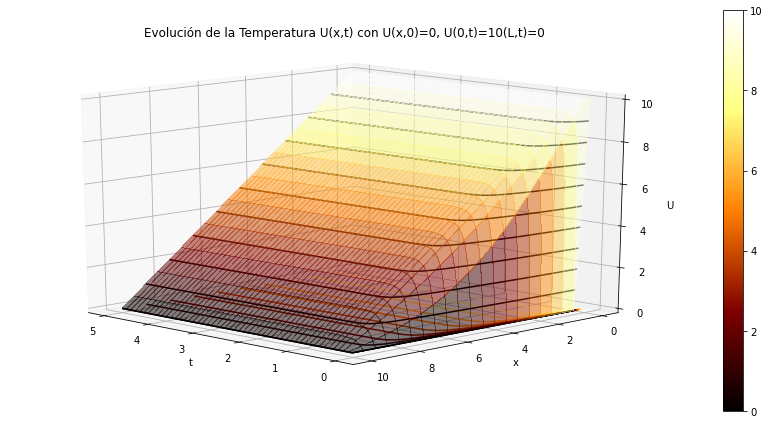

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
  

# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 5000 # Número de puntos en el tiempo

x0 = 0
xL = 10 # Longitud de la barra

t0 = 0
tF = 5.0 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 100 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
U[:, 0] = np.zeros(xspan.shape)

# Condiciones a la Frontera tipo Dirichlet
U[0, :] = 10
U[-1, :] = 0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='afmhot', linewidth=0.01, antialiased=False, alpha = 0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="afmhot", linestyles="solid", offset=0)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='afmhot')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=0, U(0,t)=10(L,t)=0')

# Punto del observador 
ax.view_init(elev=15, azim=135)

plt.tight_layout()
plt.show()

### **Caso b)** 

dt/dx**2 < 0.5? 0.03840768153630726


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: The following kwargs were not used by contour: 'lw'


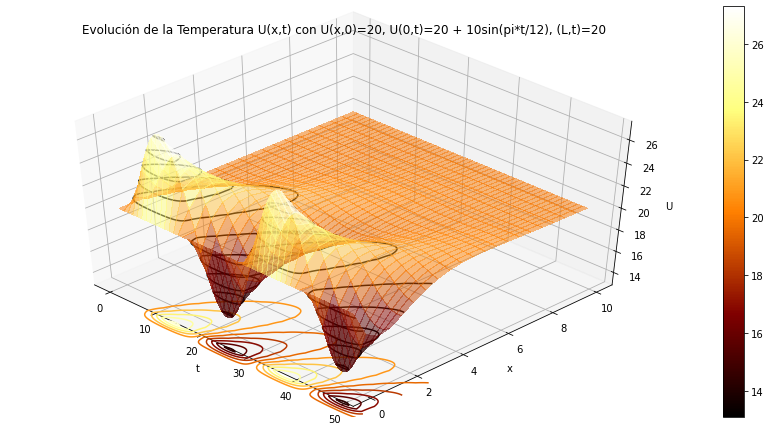

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
  

# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 5000 # Número de puntos en el tiempo

x0 = 0
xL = 10 # Longitud de la barra

t0 = 0
tF = 48.0 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 0.25 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
U[:, 0] = 20*np.ones(xspan.shape)

# Condiciones a la Frontera tipo Dirichlet
#U[0, :] = 20 + 10*np.sin(np.pi*t/12.0)
#U[-1, :] = 20.0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    # Condiciones a la frontera (varía con el tiempo) 
    t=k*dt
    U[0, :] = 20 + 10*np.sin(np.pi*t/12.0)
    U[-1, :] = 20.0
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='afmhot', linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="afmhot", linestyles="solid", offset=10)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='afmhot')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=20, U(0,t)=20 + 10sin(pi*t/12), (L,t)=20')

# Punto del observador 
ax.view_init(elev=45, azim=-45)

plt.tight_layout()
plt.show()

## **Problema 2:**

**Variaciones de la Temperatura en el Suelo**

La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera. 

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje $x$ la dirección hacia dentro del suelo.

A cierta profundidad $x=L$, suponemos que la temperatura ya no cambia, es decir $\partial u/\partial x = 0$ (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como 

\begin{equation*}
u(0,t) = u_0 + u_a \sin (\frac{2\pi t}{P})
\end{equation*}

donde $u_0$ es la inical temperatura promedio del suelo y $u_a$ es la temperatura del aire. La constante $P$ es el periodo de variación diaria de temperatura $P=24 h=86,400 s$.

En este caso la constante de difusión de calor es $\kappa = 1.0 \times 10^{-6}$. El tiempo será medido en segundos. 

Usando la Ecuación de Calor, determina numéricamente  la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que $u_0=15ºC$, $u_a= 20ºC$.

Realiza una simulación de al menos 48 horas. 

dt/dx**2 < 0.5? 184.32


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: The following kwargs were not used by contour: 'lw'


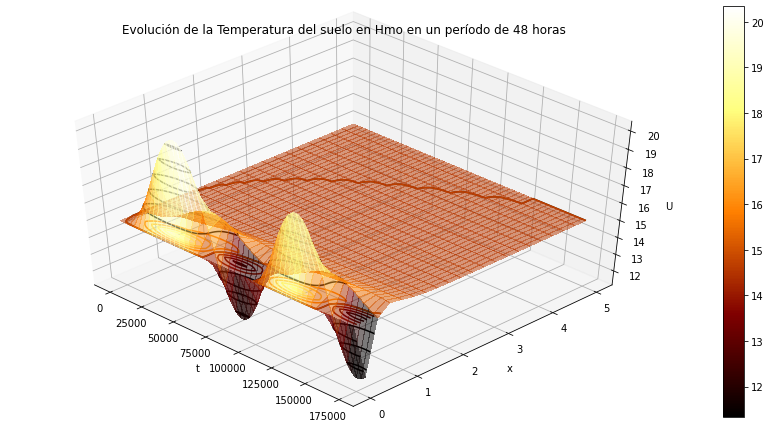

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
  

# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 15001 # Número de puntos en el tiempo

x0 = 0 # superficie
xL = 5 # profundidad

t0 = 0
tF = 172800 # tiempo final, 48 hr en seg

P = 86400 # constante P, periodo de variación diaria de temp, 24 hr en seg

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 1.0*10**-6 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
U[:, 0] = 15*np.ones(xspan.shape)

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    # Condiciones a la frontera (varía con el tiempo) 
    t=k*dt
    U[0, :] = 15.0 + 20*np.sin(2*np.pi*t/P)
    U[-1, :] = 15.0
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='afmhot', linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="afmhot", linestyles="solid", offset=15)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='afmhot')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura del suelo en Hmo en un período de 48 horas')

# Punto del observador 
ax.view_init(elev=45, azim=-45)

plt.tight_layout()
plt.show()